In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('santander_dataset.csv')

In [26]:
data.shape

(76020, 26)

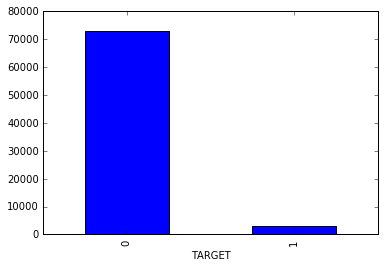

In [9]:
data.pivot_table('0', 'TARGET', aggfunc='count').plot(kind='bar')

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['TARGET'], axis=1),
                                                    data['TARGET'], test_size=0.3, random_state=0)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
cls = SVC(class_weight='balanced', probability=True)

In [ ]:
cls.fit(X_train, y_train)

In [22]:
y_pred = cls.predict(X_test)
res = roc_auc_score(y_test, y_pred)
print res

0.688955149229


In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

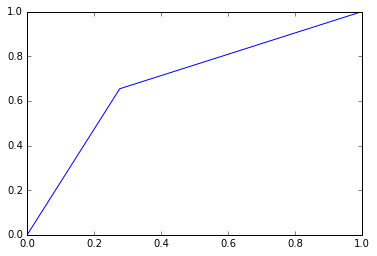

In [31]:
plt.plot(fpr, tpr)
plt.show()